In [2]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('crop_production.csv')

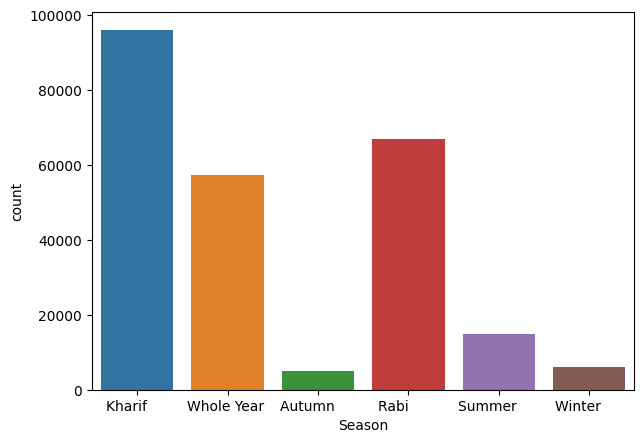

In [4]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=df,x='Season');

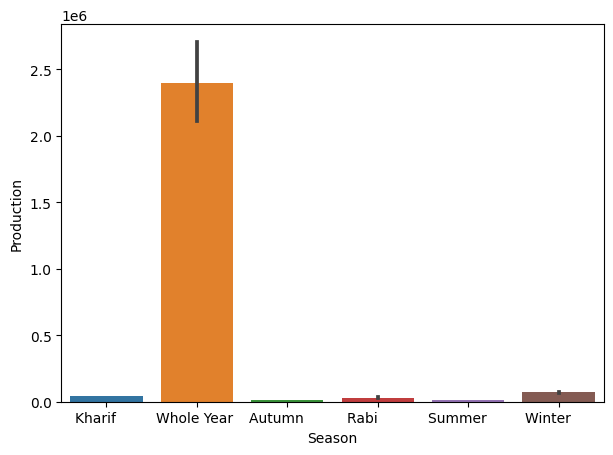

In [5]:
plt.figure(figsize=(7,5),dpi=100)
sns.barplot(data=df,x='Season',y='Production');

**Whole Year season seems to have yeilded more crops compared to other seasons in a year**

In [6]:
df['District_Name'].nunique()

646

In [7]:
state_prod = df.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
px.bar(state_prod , 'State_Name', 'Production')

**We can see that Kerela has the highest production, Also we can see that the top 3 states with highest production over the years are from South India So we can say that South India can be considered as the agricultural valley of India producing highest yeilds**

In [8]:
state_prod 

,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


In [9]:
df.groupby('State_Name').sum()['Production'].nlargest()

State_Name
Kerala            9.788005e+10
Andhra Pradesh    1.732459e+10
Tamil Nadu        1.207644e+10
Uttar Pradesh     3.234493e+09
Assam             2.111752e+09
Name: Production, dtype: float64

In [10]:
df.groupby("State_Name").sum()['Production'].nsmallest()

State_Name
Chandigarh                  63956.50
Mizoram                   1661539.83
Dadra and Nagar Haveli    1847871.00
Sikkim                    2435735.00
Manipur                   5230917.00
Name: Production, dtype: float64

In [11]:
df['Area'].shape

(246091,)

In [12]:
df.groupby(['State_Name','Crop_Year']).sum()['Production']

State_Name                   Crop_Year
Andaman and Nicobar Islands  2000         89060914.00
                             2001         89718700.00
                             2002         94387137.67
                             2003         95296454.67
                             2004         87186497.63
                                             ...     
West Bengal                  2010         38308645.00
                             2011         36777774.00
                             2012         38918275.00
                             2013         37901281.00
                             2014         43584403.00
Name: Production, Length: 519, dtype: float64

In [13]:
dist_prod = df.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production')
dist = dist_prod[0:5]
px.bar(dist , 'District_Name', 'Production')

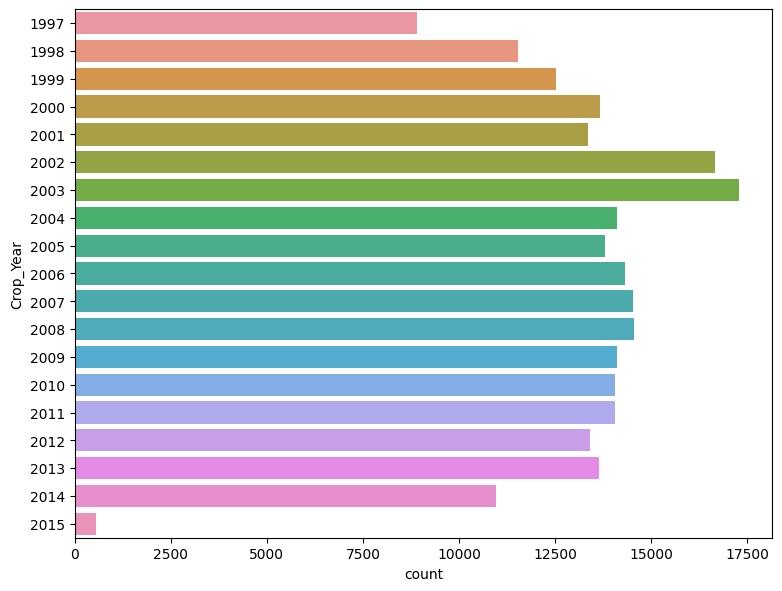

In [14]:
plt.figure(figsize=(9,7),dpi=100)
sns.countplot(data=df,y='Crop_Year');

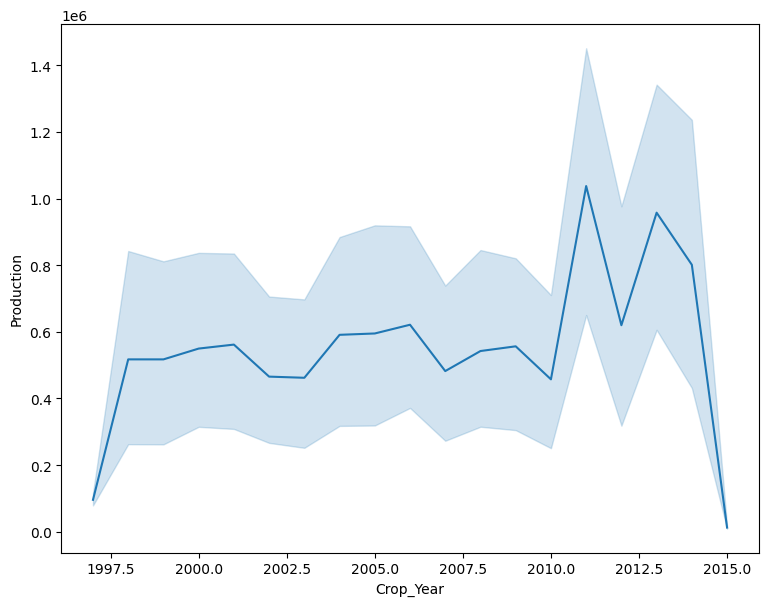

In [15]:
plt.figure(figsize=(9,7),dpi=100)
sns.lineplot(data=df,x='Crop_Year',y='Production');

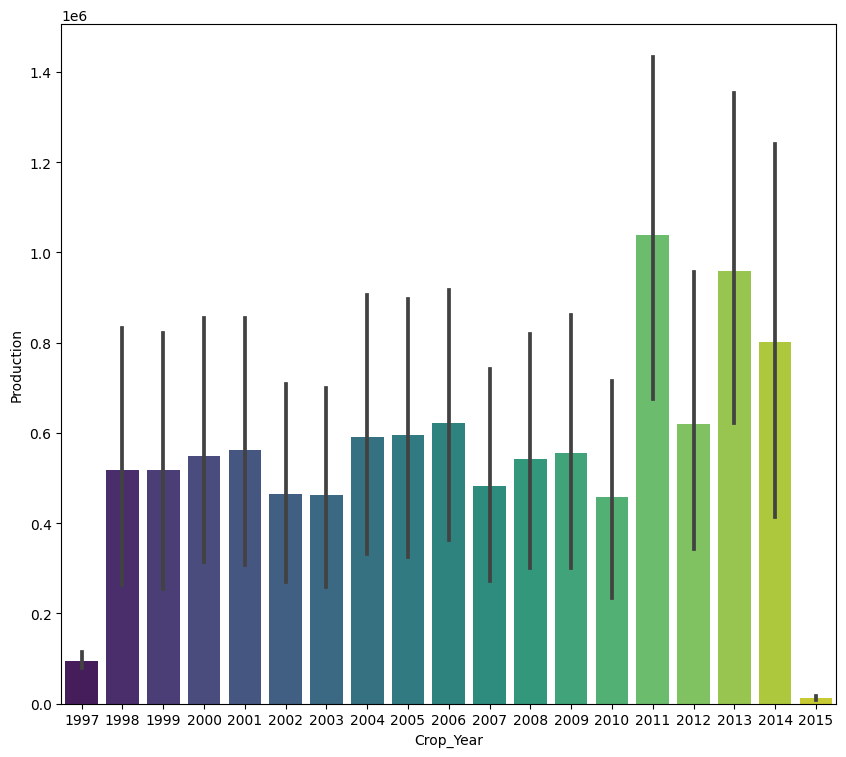

In [16]:
plt.figure(figsize=(10,9),dpi=100)
sns.barplot(data=df,x='Crop_Year',y='Production',palette='viridis');

In [17]:
df.groupby('Season').sum()['Production']

Season
Autumn         6.441377e+07
Kharif         4.029970e+09
Rabi           2.051688e+09
Summer         1.706579e+08
Whole Year     1.344248e+11
Winter         4.345498e+08
Name: Production, dtype: float64

**Most of the crop production came from Tamil Nadu let's analyze TamilNadu data**

In [18]:
TamilNadu_data = df[df['State_Name'] == 'Tamil Nadu']
TamilNadu_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
177668,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574.0,NaN
177669,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209.0,NaN
177670,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565.0,NaN
177671,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190.0,NaN
177672,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113.0,NaN


In [19]:
top_prod_TN = TamilNadu_data.groupby('Crop').sum()["Production"].reset_index().sort_values(by='Production',ascending=False).nlargest(n=10,columns='Production')
top_prod_TN

,Crop,Production
21,Coconut,1.093774e+10
73,Sugarcane,8.474968e+08
66,Rice,1.001227e+08
5,Banana,5.871609e+07
76,Tapioca,5.564865e+07
31,Groundnut,1.893340e+07
40,Maize,1.120166e+07
79,Total foodgrain,9.121209e+06
35,Jowar,4.905140e+06
23,Cotton(lint),4.277078e+06


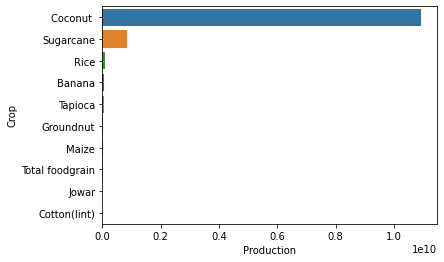

In [20]:
sns.barplot(data=top_prod_TN,y='Crop',x='Production')

In [21]:
TN_District = TamilNadu_data.groupby('District_Name').sum()['Production'].reset_index().sort_values(by='Production',ascending=False)
TN_District

,District_Name,Production
1,COIMBATORE,2.511855e+09
18,THANJAVUR,1.428293e+09
25,TIRUPPUR,1.013374e+09
4,DINDIGUL,7.673745e+08
20,THENI,6.808706e+08
28,VELLORE,5.908857e+08
9,KRISHNAGIRI,5.895962e+08
7,KANNIYAKUMARI,4.574093e+08
5,ERODE,4.078174e+08
10,MADURAI,3.736749e+08


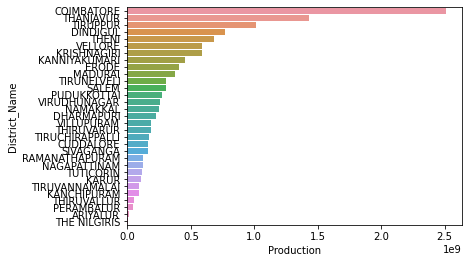

In [22]:
sns.barplot(data=TN_District,y='District_Name',x='Production')

**Now let's analyze the data across all the states in India**

In [23]:
df.groupby('Season').sum()['Production'].nlargest()

Season
Whole Year     1.344248e+11
Kharif         4.029970e+09
Rabi           2.051688e+09
Winter         4.345498e+08
Summer         1.706579e+08
Name: Production, dtype: float64

In [24]:
df['Crop'].value_counts().reset_index()

,index,Crop
0,Rice,15104
1,Maize,13947
2,Moong(Green Gram),10318
3,Urad,9850
4,Sesamum,9046
...,...,...
119,Litchi,6
120,Coffee,6
121,Apple,4
122,Peach,4


**Let's analyze the top crops by highest production in the country**

**Coconut**

In [25]:
coconut_crop = df[df['Crop'] == 'Coconut ']

In [26]:
coconut_crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0
...,...,...,...,...,...,...,...
245719,West Bengal,PURULIA,2004,Whole Year,Coconut,66.00,296.1
245756,West Bengal,PURULIA,2005,Whole Year,Coconut,74.00,311.0
245792,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0
245837,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0


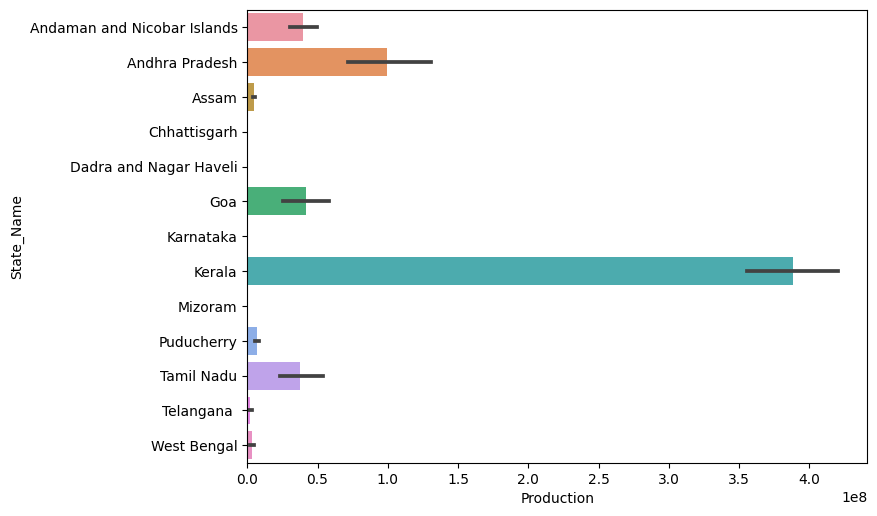

In [27]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=coconut_crop,x='Production',y='State_Name');

In [28]:
coconut_districts = coconut_crop.groupby('District_Name').sum()['Production'].nlargest().reset_index()
px.bar(data_frame=coconut_districts,x='District_Name',y='Production')

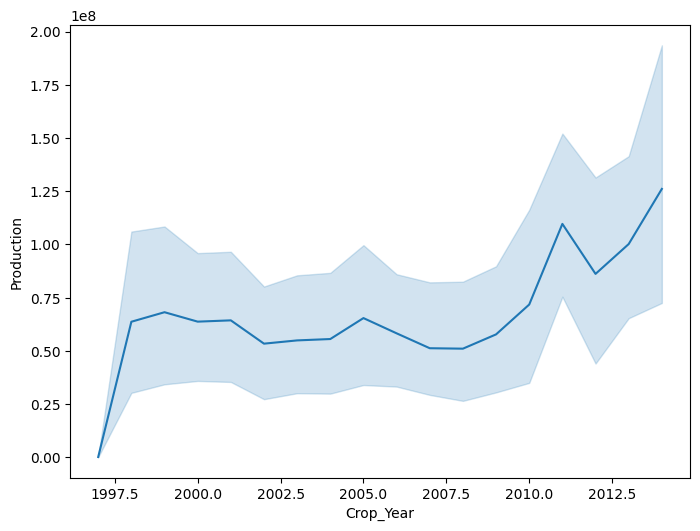

In [29]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=coconut_crop,x='Crop_Year',y='Production');

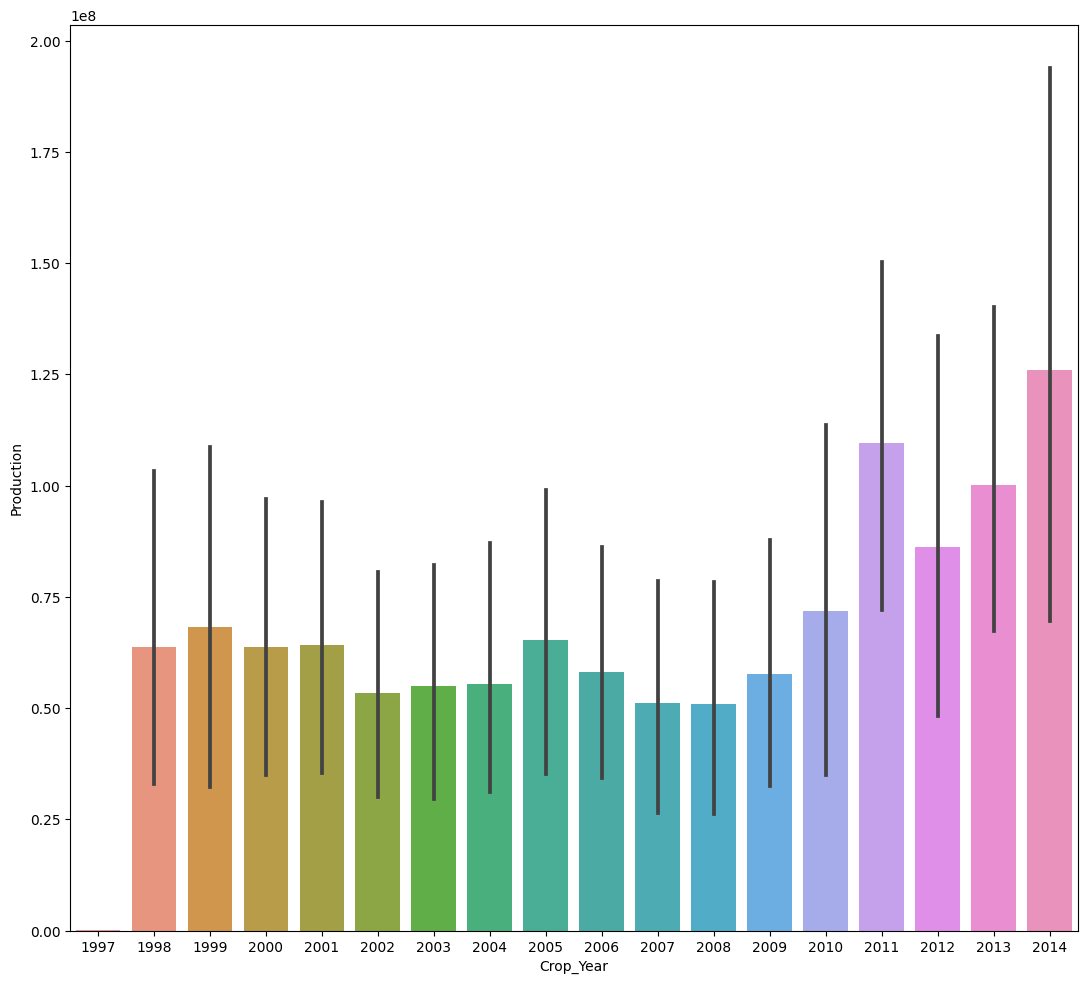

In [30]:
plt.figure(figsize=(13,12),dpi=100)
sns.barplot(data=coconut_crop,x='Crop_Year',y='Production');

In [31]:

coconut_crop.groupby('Season').sum()['Production'].nlargest()

Season
Whole Year     1.299815e+11
Kharif         1.265920e+05
Name: Production, dtype: float64

In [32]:
coconut_season = coconut_crop.groupby('Season').sum()['Production'].reset_index()
px.bar(data_frame=coconut_season,x='Season',y='Production')

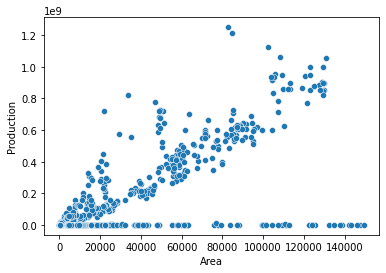

In [33]:
sns.scatterplot(data=coconut_crop,x='Area',y='Production');